In [1]:
# importing reqired libraries 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# reading dataset 

data = pd.read_csv('housing_dataset.csv')
data.head()

,Id,Neighborhood,LotFrontage,LotArea,number of bedrooms,Street,Alley,OverallQual,OverallCond,Date,...,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,SquareFootage,Heating,HeatingQC,SaleType,SaleCondition,Price
0,1,RL,65.0,8450.0,2.0,Pave,NaN,7,5,2003,...,706,Unf,0,150,856,GasA,Ex,WD,Normal,208500
1,2,RL,80.0,9600.0,3.0,Pave,NaN,6,8,1976,...,978,Unf,0,284,1262,GasA,Ex,WD,Normal,181500
2,3,RL,68.0,11250.0,3.0,Pave,NaN,7,5,2001,...,486,Unf,0,434,920,GasA,Ex,WD,Normal,223500
3,4,RL,60.0,9550.0,3.0,Pave,NaN,7,5,1915,...,216,Unf,0,540,756,GasA,Gd,WD,Abnorml,140000
4,5,RL,84.0,NaN,2.0,Pave,NaN,8,5,2000,...,655,Unf,0,490,1145,GasA,Ex,WD,Normal,250000


In [3]:
# checking columns in dataset 
data.columns

Index(['Id', 'Neighborhood', 'LotFrontage', 'LotArea', 'number of bedrooms',
       'Street', 'Alley', 'OverallQual', 'OverallCond', 'Date', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'SquareFootage', 'Heating', 'HeatingQC',
       'SaleType', 'SaleCondition', 'Price'],
      dtype='object')

In [4]:
x = pd.DataFrame(data['LotArea'].values.reshape(-1,1))


y = pd.DataFrame(data['Price'].values.reshape(-1,1))

In [5]:
print(x.isnull().sum())
print(y.isnull().sum())

0    38
dtype: int64
0    0
dtype: int64


In [6]:
# filling null values in x
x_ =x.fillna(np.mean(x))

In [7]:
print(x_.isnull().sum())

0    0
dtype: int64


In [8]:
# performing standerdizatioin 
ssc = StandardScaler()
X = ssc.fit_transform(x_)
Y = ssc.fit_transform(y)


In [9]:
# Now spliting the data into test and train 

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=41)

In [10]:
# fitting linearregression model over data 
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_predict = lr.predict(x_test)

In [69]:
mse = mean_squared_error(y_test,y_predict)
mse

0.8375095040161203

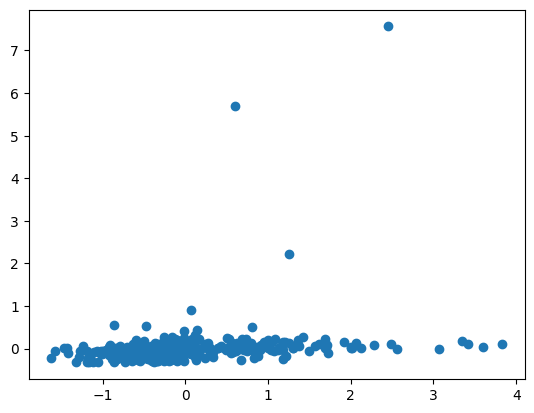

In [71]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,y_predict)